# Machine Learning - Practical 1 - Linear Regression

Author: Bilal Kachir |
Summer Term 2025   

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebook and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 practicals to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

- Do not change the function interfaces.

## Imports

Jupyter Notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [3]:
data = pd.read_csv('data/superconduct_train.csv')
print(data.shape)
# 82 features
# 21263 samples/materials

(21263, 82)


In [4]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed. This makes the train and test splits same even if you re-run the notebook. Keeping the splits same is important for the fair models comparison.

In [5]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
# critical_temp is given as a column
n_trainset = 200  # size of the training set
n_testset = 500  # size of the test set

In [6]:
# set random seed to make sure every test set is the same
np.random.seed(seed=1)

# np.arrange to create array of indices for all samples
idx = np.arange(data.shape[0])
print(idx)
idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set
print(idx_shuffled)

# Slice from 0 to 199
test_idx = idx_shuffled[:n_testset]
# 200 to 699, small trainset
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
# 499 to end, large trainset
train_full_idx = idx_shuffled[n_testset:]

# Take values by indices except target_clm which is critical temp
X_test_raw = data.loc[test_idx, data.columns != target_clm].values
#print(X_test_raw)
y_test = data.loc[test_idx, data.columns == target_clm].values
#print(y_test)
print('Test set shapes (X and y)', X_test_raw.shape, y_test.shape)

X_train_raw = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):', X_train_raw.shape, y_train.shape)

X_train_full_raw = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):', X_train_full_raw.shape, y_train_full.shape)

[    0     1     2 ... 21260 21261 21262]
[  945 12019  8952 ...  5192 12172   235]
Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatter plots** relating the target variable to one of the feature values. For this you will need 81 scatter plots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

Furthermore, we need to normalize the data, such that each feature has a mean of zero mean and a variance of one. Implement a function `normalize` which normalizes the data. Print the means and standard variation of the first five features before and after.

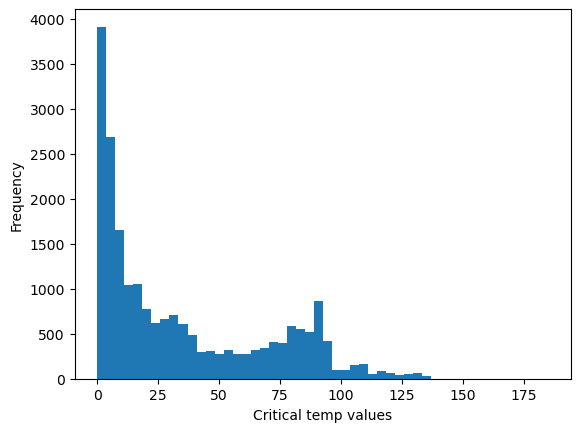

In [7]:
# Histogram of the target variable
plt.hist(data['critical_temp'], bins = 50)
plt.xlabel("Critical temp values")
plt.ylabel("Frequency")
plt.show()


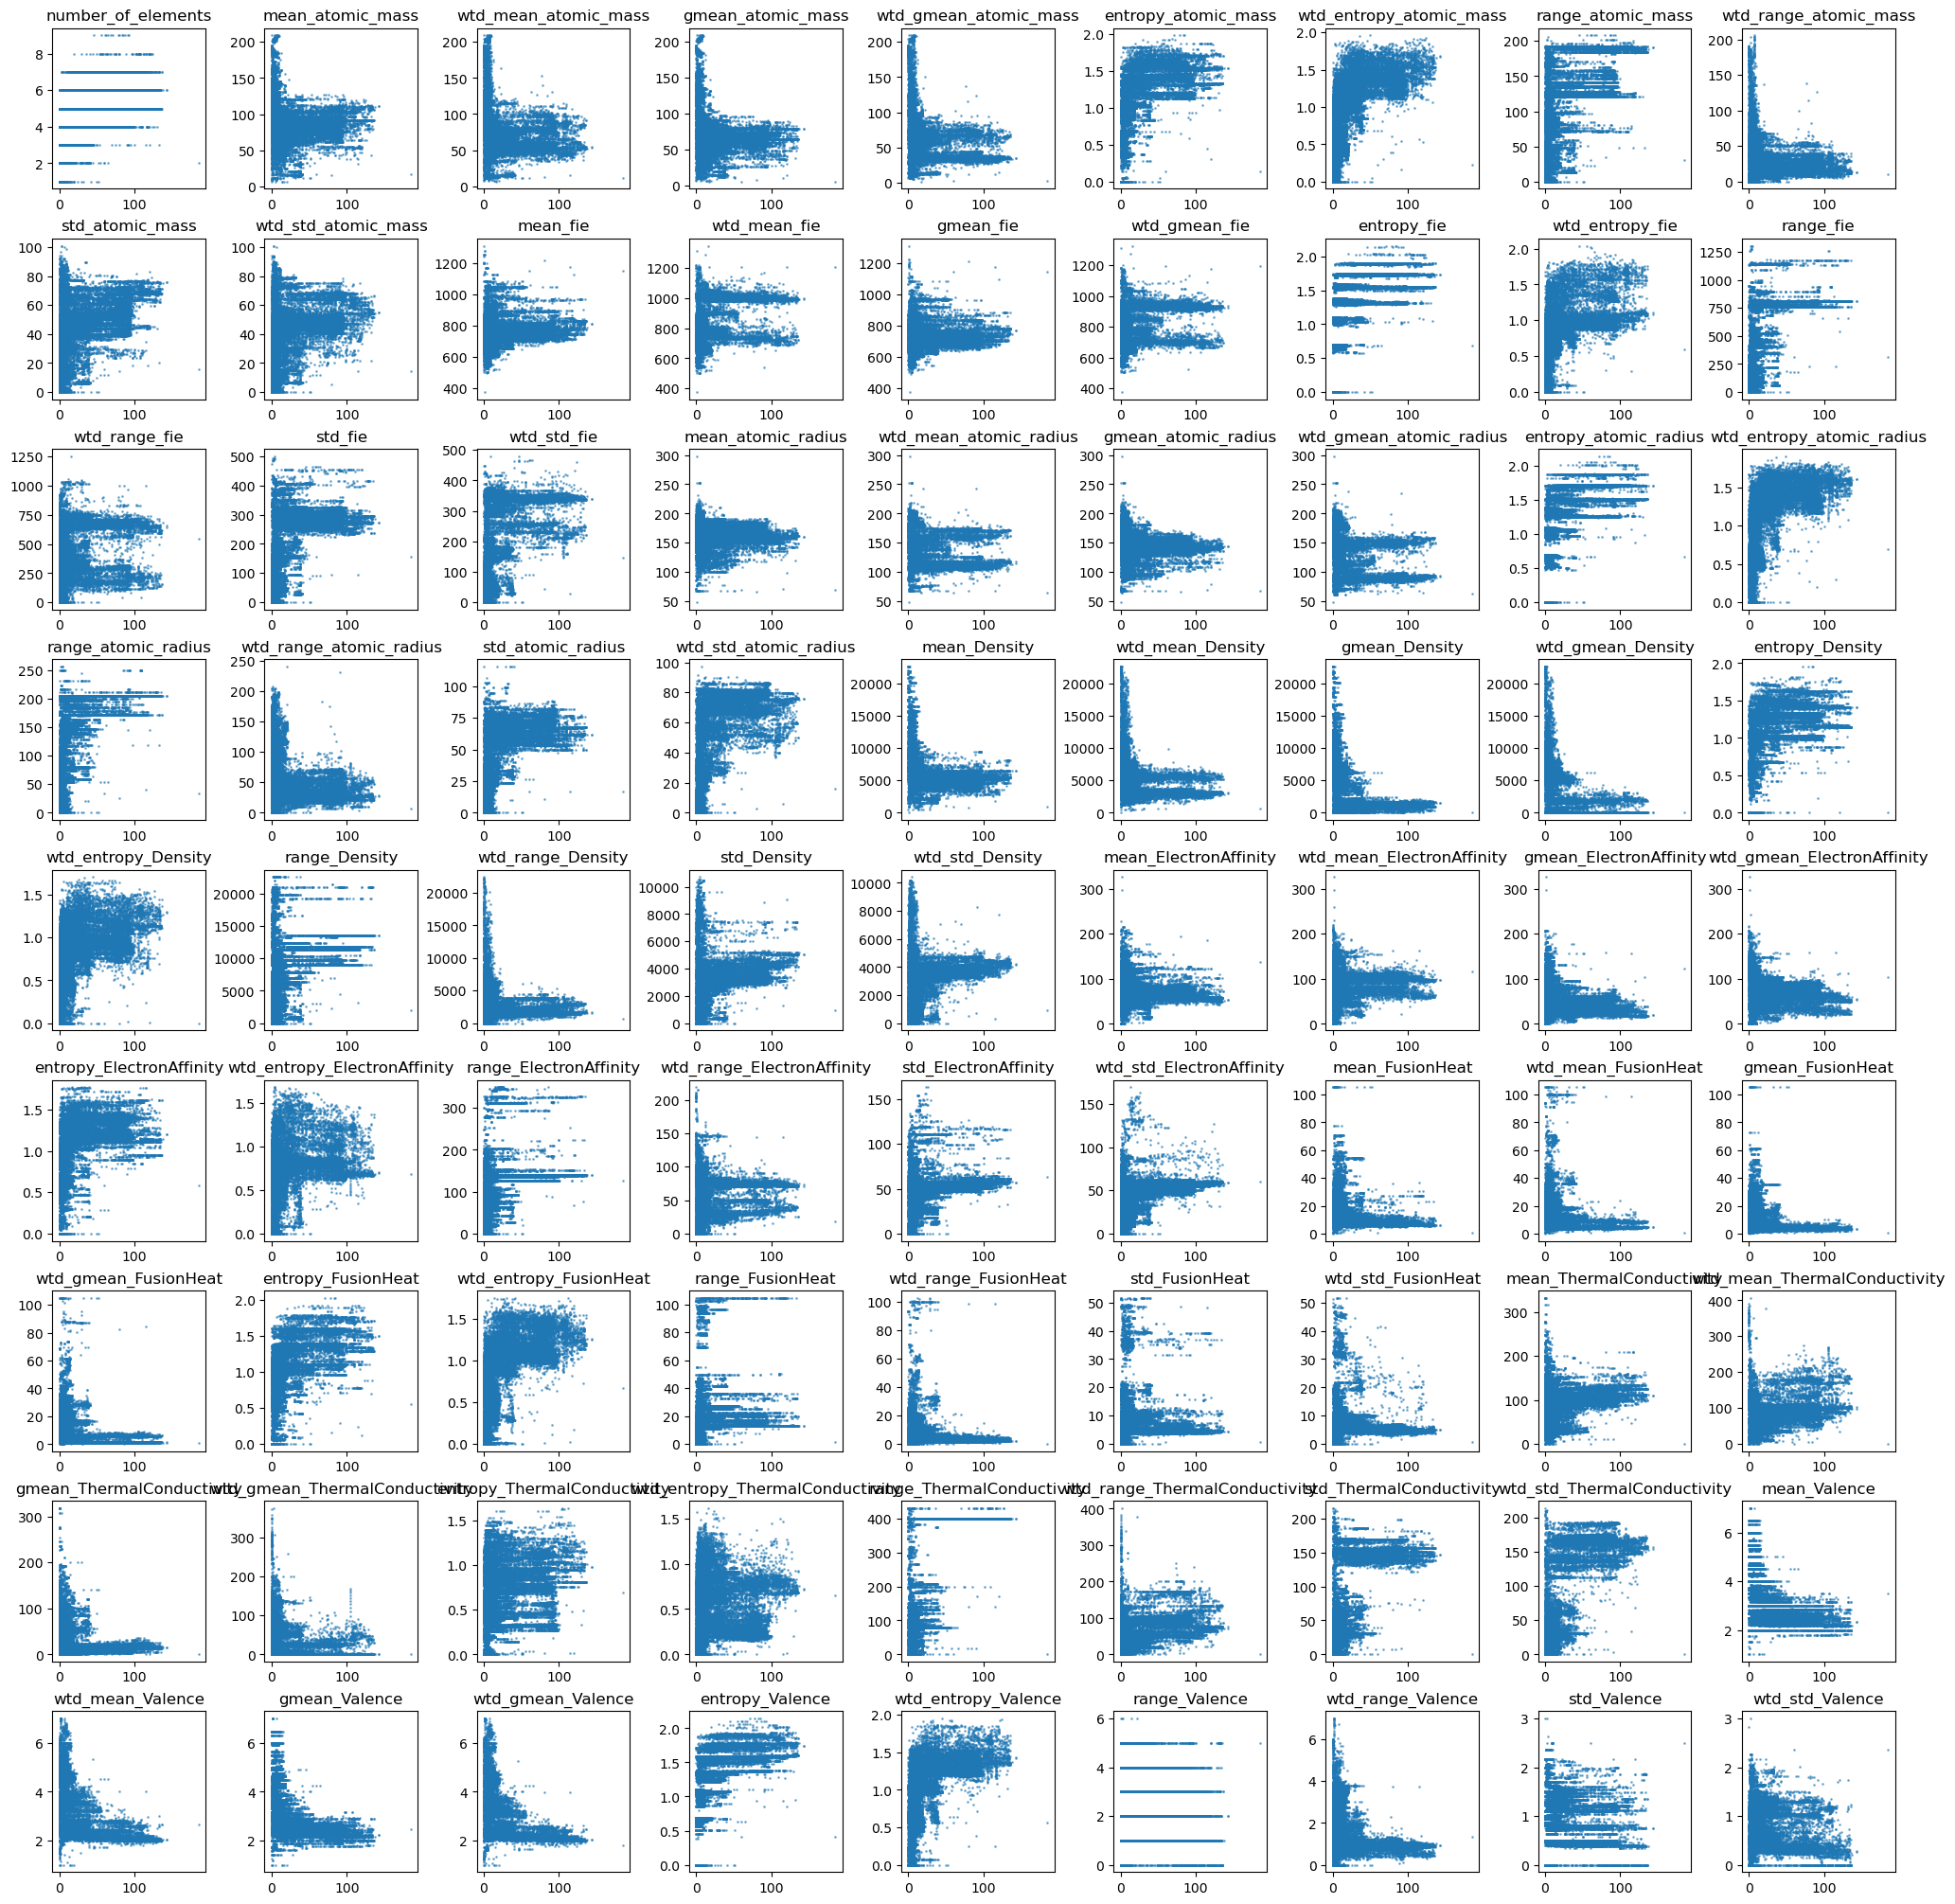

In [7]:
fig, axes = plt.subplots(nrows=9, ncols=9, figsize=(20, 20), constrained_layout=True)
for i, feature in enumerate(data.columns):
    if feature == target_clm:
        continue
    ax = axes.flat[i]  # flatten axes array and select subplot
    ax.scatter(data[target_clm], data[feature], s = 1, alpha = 0.5)  # plot critical_temp vs feature
    ax.set_title(feature)  # label subplot by feature name
#fig.tight_layout()  # spacing

In [8]:
# Normalize
def normalize(X_train, X_train_full, X_test):
    # combine full training and test sets
    X_all = np.vstack((X_train_full, X_test))
    # mean of all features
    mean_all = X_all.mean(axis=0)
    # std of all features
    std_all = X_all.std(axis=0)
    # normalize small training set
    X_train_norm = (X_train - mean_all) / std_all
    # normalize full training set
    X_train_full_norm = (X_train_full - mean_all) / std_all
    # normalize test set
    X_test_norm = (X_test - mean_all) / std_all
    return X_train_norm, X_train_full_norm, X_test_norm, mean_all, std_all

# Apply normalize function
X_train_norm, X_train_full_norm, X_test_norm, mean_all, std_all = normalize(
    X_train_raw, X_train_full_raw, X_test_raw
)

# print means and stds of first five features before normalization
print('Raw combined data')
print('Means:', np.round(mean_all[:5], 2))
print('Stds :', np.round(std_all[:5], 2))
print()
# print means and stds of first five features after normalization on Small train
print('Normalized small training set')
print('Means:', np.round(X_train_norm[:, :5].mean(axis=0), 2))
print('Stds :', np.round(X_train_norm[:, :5].std(axis=0), 2))
print()
# print means and stds of first five features after normalization on full train
print('Normalized full training set')
print('Means:', np.round(X_train_full_norm[:, :5].mean(axis=0), 2))
print('Stds :', np.round(X_train_full_norm[:, :5].std(axis=0), 2))
print()
# print means and stds of first five features after normalization on test
print('Normalized test set')
print('Means:', np.round(X_test_norm[:, :5].mean(axis=0), 2))
print('Stds :', np.round(X_test_norm[:, :5].std(axis=0), 2))


print(data.columns)

Raw combined data
Means: [ 4.12 87.56 72.99 71.29 58.54]
Stds : [ 1.44 29.68 33.49 31.03 36.65]

Normalized small training set
Means: [ 0.05  0.01  0.01 -0.   -0.  ]
Stds : [1.05 0.99 0.94 0.99 0.95]

Normalized full training set
Means: [-0.  0.  0.  0.  0.]
Stds : [1. 1. 1. 1. 1.]

Normalized test set
Means: [ 0.09 -0.07 -0.08 -0.07 -0.07]
Stds : [0.99 0.96 0.9  0.93 0.9 ]
Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_ato

Which material properties may be useful for predicting superconductivity? What other observations can you make?

## Observations
In the grid several features show very similar point shapes. There could be correlation or even multicollinearity between features. It could mask their individual meaning and move prediction variance upward. This could be mitigated by regularising the most redundant features.

## Superconductivity:
Superconductivity is the dissappearance of electrical resistance in a solid cooled below a certain critical tempereature
A superconductor conducts electricity with no resistance or energy loss

- Tc marks the temperature below which a material exhibits zero electrical resistance
- Tc dictates the cooling requirements
- Higher Tc materials are desirable
- Tc reflects underlying physical properties

[Source](https://sciencenotes.org/superconductors-and-superconductivity)


### Properties
Number of Elements
`number_of_elements`
-> number of elements in the material, general material properties

Weighted mean electronegativit and range of electronegativity
`wtd_mean_fie, range_fie`
Large differences drive charge transfer or polarizability—key in unconventional pairing (e.g. cuprates)


Atomic radius
`mean_atomic_radius, entropy_atomic_radius`
A measure of dispersion in ionic sizes, which often correlates with the ability to form layered or perovskite‐type structures.

Weighted mean and standard deviation of thermal conductivity
`wtd_mean_ThermalConductivity, std_ThermalConductivity`
Since phonon transport and lattice thermal properties influence Cooper–pair lifetimes in conventional superconductors

Mean and range of atomic mass
`mean_atomic_mass, range_atomic_mass`
Heavier atoms can soften phonon modes (affecting electron–phonon coupling), while a large mass range can introduce lattice strain or anharmonicity

Mean and weighted mean electron affinity
`mean_ElectronAffinity, wtd_mean_ElectronAffinity`
Large differences drive charge transfer or polarizability—key in unconventional pairing (e.g. cuprates).

Mean Valence and weighted standard deviation of Valence
`mean_Valence, wtd_std_Valence`
Metal valence configurations influence the density of states at the Fermi level.


## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [9]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred, s=2)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

MSE:  17928.79570726673
r^2:  -13.313953173396845


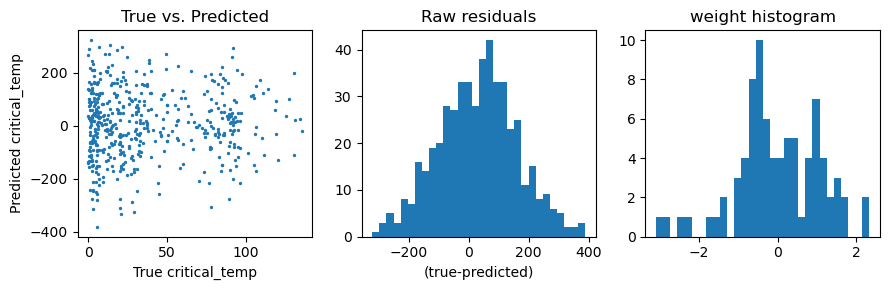

In [10]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_testing = np.random.randn(y_test.size) * np.max(y_test)

plot_regression_results(y_test, y_pred_testing, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regression result, you should get mean squared error of 599.7.

In [12]:
def ols_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # add a column of ones for the offset term in training and test sets
    X_tr = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_te = np.hstack([np.ones((X_test.shape[0], 1)),  X_test])

    # compute transpose of training design matrix
    X_tr_T = X_tr.T

    # compute X^T X
    X_tr_T_dot_X_tr = X_tr_T.dot(X_tr)

    # invert X^T X
    inverted_dot = np.linalg.inv(X_tr_T_dot_X_tr)

    # compute X^T y
    X_tr_T_dot_y = X_tr_T.dot(y_train)
    
    # compute weights = (X^T X)^{-1} X^T y
    weights = inverted_dot.dot(X_tr_T_dot_y)
    
    # compute predictions on the test set
    y_pred = X_te.dot(weights)
    
    return weights, y_pred

MSE:  599.739762624498
r^2:  0.5211810643281658


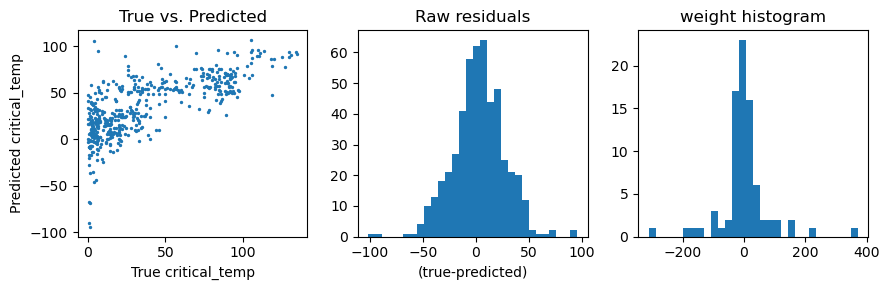

In [13]:
weights, y_pred = ols_regression(X_test_norm, X_train_norm, y_train)

# Plots of the results
reg_plot = plot_regression_results(y_test, y_pred, weights)
plt.savefig("reg_plot_task_2.png", dpi = 300)

What do you observe? Is the linear regression model good?

### Linear Regression 
fits a straight‐line model  
$$\hat y = Xw + b$$
by choosing weights $w$ (and intercept $b$) to minimize the mean squared error (MSE) between predictions $\hat y$ and true targets $y$.

### MSE and R^2
MSE = 599.74 high squared error
$R^2$ = 0.52 model explains around $52\%$ of variance in critical temperature


### True vs. Predicted Plot 
All points should lie on the 45° identity line but there is ubstantial scatter at different critical-temps

### Raw Residuals Histogram
Centered around zero (no large bias) but a wide spread

### Weight Histogram
Most weights near zero, but a few very large coefficients appear
Large weights hint at multicollinearity or features dominating the fit  


## Task 3: Compare your implementation to sklearn

Now, familiarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [14]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    ols = linear_model.LinearRegression()
    ols.fit(X_train, y_train)
 
    # Get weights
    weights = np.append(ols.coef_, ols.intercept_)

    y_pred = ols.predict(X_test)
    
    return weights, y_pred

MSE:  599.7397626177988
r^2:  0.5211810643335144


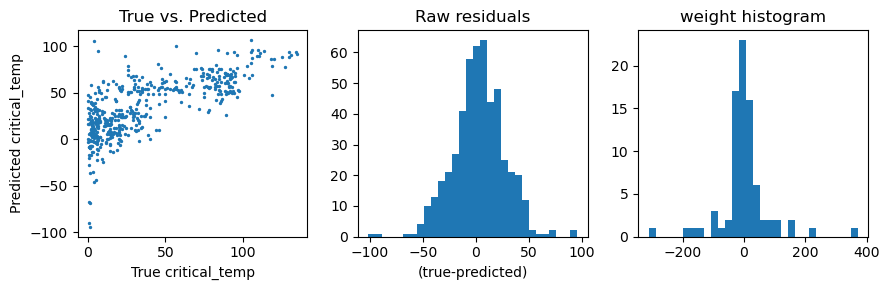

In [15]:
weights, y_pred = sklearn_regression(X_test_norm, X_train_norm, y_train)
plot_regression_results(y_test, y_pred, weights)

If you implemented everything correctly, the MSE is again 599.7.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

MSE:  329.860701041069
r^2:  0.7366465263178832


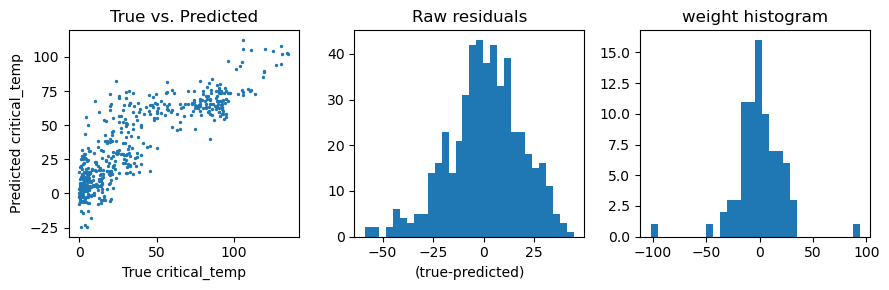

In [16]:
weights, y_pred = sklearn_regression(X_test_norm, X_train_full_norm, y_train_full)
plot_regression_results(y_test, y_pred, weights)

 How does test set performance change? What else changes?

### MSE and $R^2$
MSE: 329.86
Prediction error is now almost half of what it was on the smaller dataset  
$R^2$: 0.74
Model captures about 74 % of the variance (up from 52 %) - higher explanatory power

#### True vs. Predicted  
Earlier: wide scatter; many points far from the 45 ° line.  
Now:cluster tightens around the identity line, samples still deviate, but overall fit is better

#### Residual Histogram  
Earlier: broad, heavy-tailed distribution +-100
Now: narrower bell centred at 0; tails shrink (+-50) - fewer large mistakes

#### Weight Histogram  
Shape still peaks near zero with some large coefficients - larger dataset might reduce over-reliance on a handful of features and lower multicollinearity effects

> **Take-away:** increasing the training data greatly improves generalisation—the model is more accurate (lower MSE) and more explanatory (\(R^2\) ↑), with tighter residuals and a more stable coefficient spread.

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (X^TX + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [17]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha
       on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regression model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''


    # Append a column of 1s to include the bias term
    X_tr = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    X_te = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

    n_coef = X_tr.shape[1]  # total coefficients
    I = np.eye(n_coef)  # identity
    XtX = X_tr.T.dot(X_tr)  # X^T X
    regularised = XtX + alpha * I  # X^T X + alpha I
    inv_regularised = np.linalg.inv(regularised)  # (X^T X + alpha I)^(-1)

    Xty = X_tr.T.dot(y_train)  # X^T y

    weights = inv_regularised.dot(Xty)  # parameters
    y_pred = X_te.dot(weights)  # predictions

    return weights, y_pred

Run the ridge regression on `X_train` with an alpha value of 10 and plot the obtained weights.

MSE:  435.7237698491761
r^2:  0.6521277982084899


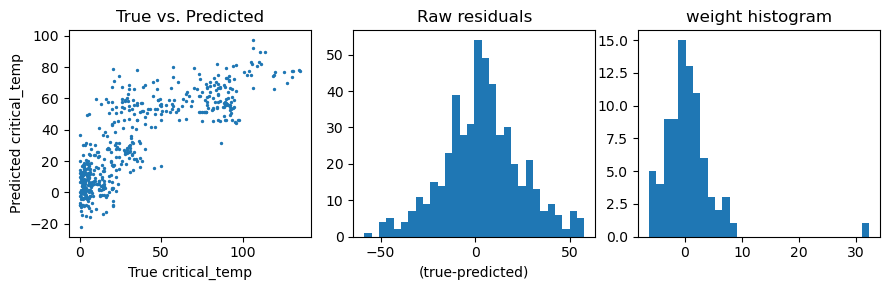

In [19]:
# Run ridge regression with alpha=10
alpha=10
weights, y_pred = ridge_regression(X_test_norm, X_train_norm, 
                                               y_train, alpha)
# Plot regression results
plot_regression_results(y_test, y_pred, weights)

Now test a range of log-spaced $\alpha\text{s}$ (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.


In [39]:
alphas = np.logspace(-7, 7, 20)

from sklearn.metrics import mean_squared_error

mse_list = []
weights_list = []

# Loop over all alpha values
for alpha in alphas:
    weights, y_pred = ridge_regression(X_test_norm, X_train_norm, y_train, alpha)
    
    # Calc and save test set MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    weights_list.append(weights.flatten()) 

# Convert to np arrays
weights_array = np.array(weights_list)

Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

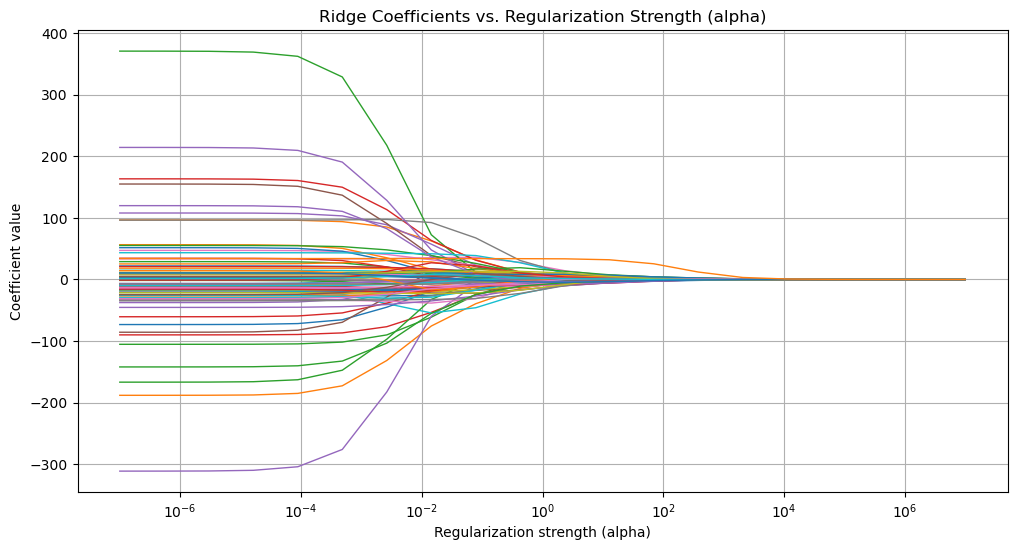

In [40]:
weights_T = weights_array.T
plt.figure(figsize=(12, 6))

for i in range(weights_T.shape[0]):
    plt.plot(alphas, weights_T[i, :], linewidth=1)

# we used log scale
plt.xscale('log')
plt.xlabel('Regularization strength (alpha)')
plt.ylabel('Coefficient value')
plt.title('Ridge Coefficients vs. Regularization Strength (alpha)')
plt.grid()
plt.savefig('ridge_coefficients_vs_regularization_strength_alpha.png', dpi=300, bbox_inches='tight')

plt.show()

Why are the values of the weights largest on the left? Do they all change monotonically? 

ANSWER:
## Weight/Coefficent Values vs. Regularization
For small values of alpha, approaching zero, the regularization penalty is very weak. As a result, the model is very similar to ordinary least squares (OLS) model. As OLS tries to minimizes the training error, even if using large weights to learn the noise in the data. This can results to large weights.
As alpha increases, the regularization penalty grows stronger, causing the coefficients to shrink and move to zero. The model not only tries to minimize the error, but also tries to minimize the wieghts. This approach prevents overfitting and leads to a simpler and more generalized model.
## Weights Monotonicity
Not all weights exhibit monotonic changes. Some coefficients may fluctuate before decreasing.

This is because some features may have a stronger influence on explaining the target variable at lower regularization levels (small alpha), but as alpha increases, these features are more heavily penalized, leading to some other features having more impact.

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$ should be close to the test-set MSE of the unregularized solution, i.e. 599.7(edited).

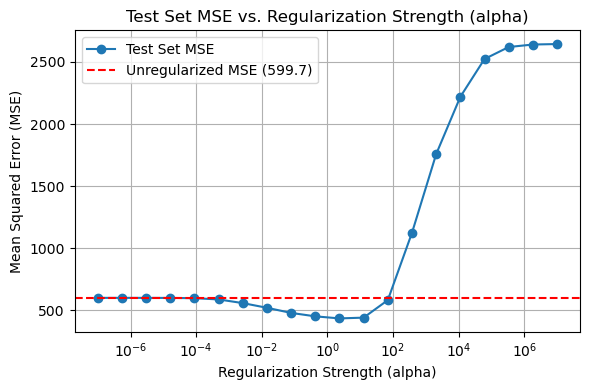

MSE for alpha = 1.0e-07: 599.74
Minimum MSE: 434.20 at alpha = 2.34e+00


In [41]:
# Plot of MSE  vs. alphas
plt.figure(figsize=(6, 4))
plt.plot(alphas, mse_list, label='Test Set MSE', marker='o')
plt.xscale('log')  # Log scale for alpha
plt.yscale('linear')  # Linear scale for MSE
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test Set MSE vs. Regularization Strength (alpha)')
plt.grid()

# Sanity check: Mark the MSE for alpha near 0 (unregularized case)
plt.axhline(y=599.7, color='red', linestyle='--', label='Unregularized MSE (599.7)')
plt.legend()

plt.tight_layout()
plt.show()

# Print MSE for very small alpha (should be close to 599)
print(f"MSE for alpha = {alphas[0]:.1e}: {mse_list[0]:.2f}")

min_mse = min(mse_list)
best_alpha = alphas[mse_list.index(min_mse)]
print(f"Minimum MSE: {min_mse:.2f} at alpha = {best_alpha:.2e}")

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~600(edited) on the left?

ANSWER:
## Minimum alpha and error
The lowest mean squared error (MSE) observed was 434.20, achieved when α = 2.34. In comparison, the unregularized model (with alpha = 0) produced a higher MSE of approximately 600, showing that moderate regularization helps reducing overfitting and improve the model's generalization.

When alpha is very small (approaching zero), the regularization effect is very weak. In this manner, ridge regression is very similar to the OLS. As a result, the error at very small alpha should be close to that of the unregularized model, around 600.

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [42]:
from sklearn.linear_model import Ridge
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # Ridge regression model with alpha
    model = Ridge(alpha=alpha, fit_intercept=True)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Get learned weights
    weights = np.append(model.coef_, model.intercept_)

    return weights, y_pred

This time, only plot how the performance changes as a function of $\alpha$. 

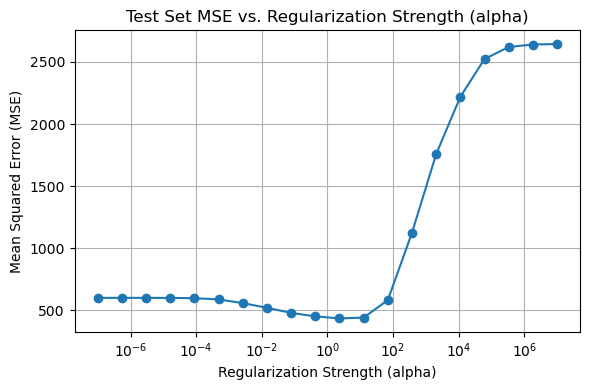

In [43]:
# Plot of MSE  vs. alphas
from sklearn.metrics import mean_squared_error
alphas = np.logspace(-7, 7, 20)

mse_list = []
weights_list = []

# Loop through all alpha values
for alpha in alphas:
    weights, y_pred = ridge_regression(X_test_norm, X_train_norm, y_train, alpha)
    
    # Compute and store test set MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    weights_list.append(weights.flatten()) 

plt.figure(figsize=(6, 4))
plt.plot(alphas, mse_list, label='Test Set MSE', marker='o')
plt.xscale('log')  # Log scale for alpha
plt.yscale('linear')  # Linear scale for MSE
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test Set MSE vs. Regularization Strength (alpha)')
plt.grid()

plt.tight_layout()
plt.show()

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [45]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility.
    '''

    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)

    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # split indices into equally sized folds
    folds = np.array_split(indices, n_folds)

    for i in range(n_folds):
        
        val_idx = folds[i]
        X_val = X[val_idx]
        y_val = y[val_idx]

        # training folds
        train_idx = np.hstack(folds[:i] + folds[i+1:])
        X_train = X[train_idx]
        y_train = y[train_idx]

        for j, alpha in enumerate(alphas):
            # ridge regression
            weights, y_pred = ridge_regression(X_val, X_train, y_train, alpha)

            # calculate and store MSE for validation set
            cv_results_mse[i, j] = mean_squared_error(y_val, y_pred)


    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [46]:
alphas = np.logspace(-7, 7, 100)
mse_cv = ridgeCV(X_train_norm, y_train, n_folds=10, alphas=alphas)

We plot the MSE trace for each fold separately:

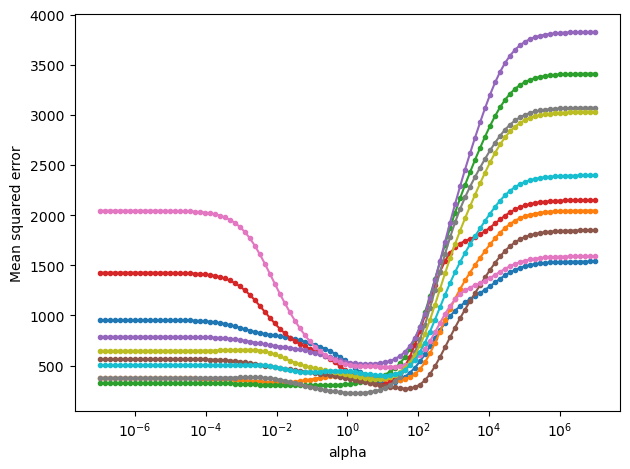

In [48]:
plt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We also plot the average across folds:

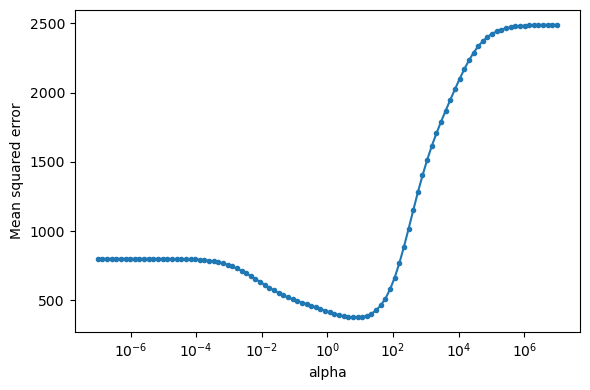

In [49]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

In [48]:
# Find the alpha with the minimum average MSE
mean_mse_across_folds = mse_cv.mean(axis=0)
optimal_idx = np.argmin(mean_mse_across_folds)
optimal_alpha = alphas[optimal_idx]
optimal_mse = mean_mse_across_folds[optimal_idx]

print("Optimal alpha from cross-validation")
print(optimal_alpha)
print("Optimal MSE from cross-validation")
print(optimal_mse)

Optimal alpha from cross-validation
8.302175681319735
Optimal MSE from cross-validation
376.09889394420776


What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

MSE:  433.3320131310421
r^2:  0.6540373237686284


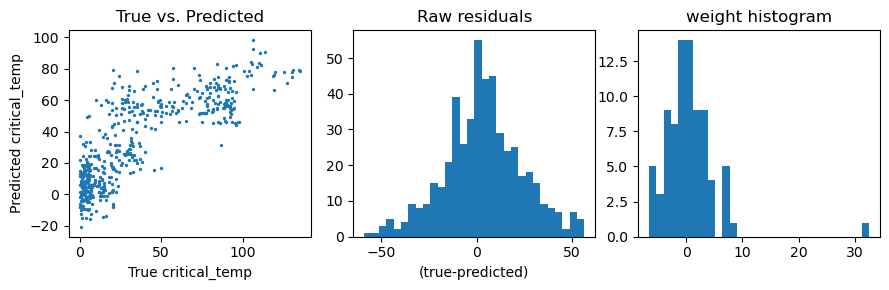

In [51]:
# Run ridge regression with alpha=8.3
alpha=8.3
weights, y_pred = ridge_regression(X_test_norm, X_train_norm, 
                                               y_train, alpha)

plot_regression_results(y_test, y_pred, weights)

MSE:  434.18980190390965
r^2:  0.6533524842217917


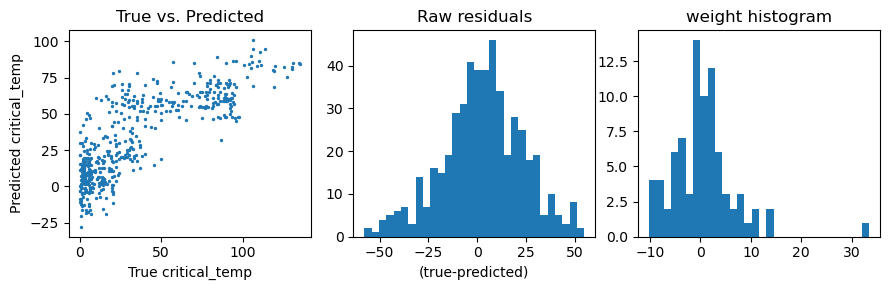

In [54]:
# Run ridge regression with alpha=2.34
alpha=2.34
weights, y_pred = ridge_regression(X_test_norm, X_train_norm, 
                                               y_train, alpha)
plot_regression_results(y_test, y_pred, weights)

Answer
## cross_validation optimal alpha and error
The optimal alpha from cross-validation is 8.30, with a cross-validation MSE of 433.33

This is reasonably close to the alpha found using the test set (α ≈ 2.34, with a test-set MSE of 434.19). While the exact alpha differs, they are in the same magnitude.

The cross-validation MSE (433.30) and the test set MSE (434.19) are very close. This suggests that the model generalizes well (perfrom well on the test set) using only training data for tuning hyperoarameter(in this case ridge regression, alpha).

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [52]:
alphas = np.logspace(-7, 7, 100)
mse_cv_full = ridgeCV(X_train_full_norm, y_train_full, n_folds=10, alphas=alphas)

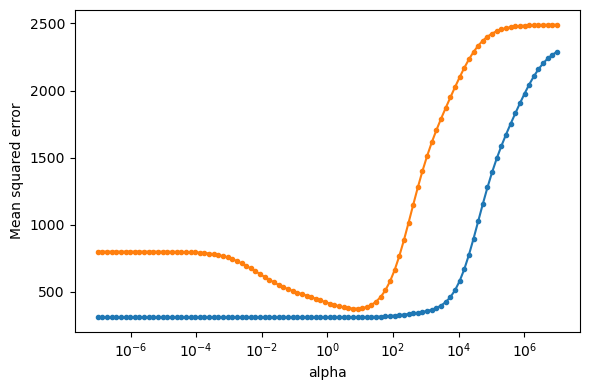

In [53]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We zoom in on the blue curve to the very left:

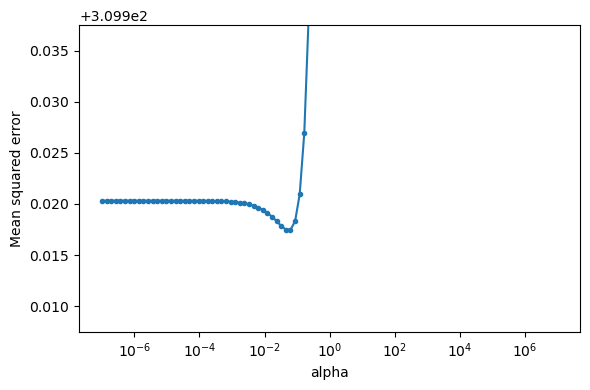

In [54]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.xscale('log')
minValue = np.min(np.mean(mse_cv_full, axis=0))
plt.ylim([minValue-.01, minValue+.02])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

In [55]:
opt_idx = np.argmin(np.mean(mse_cv_full, axis=0))
opt_alpha = alphas[opt_idx]
opt_alpha

0.06280291441834246

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

## Full vs small training set
The cross-validation (CV) curve on the full dataset looks different because we now have much more training data available to estimate our parameters(weights). With a small training set, the model is more prone to overfitting and needs stronger regularization to prevent overfitting.

With the full dataset, the model benefits from more information, which naturally helps reduce variance error without relying as heavily on regularization. In this case, even a very small regularization strength (alpha = 0.063) is sufficient to prevent overfitting. This α value is two orders of magnitude smaller than the ones selected on the smaller training set (alpha ≈ 2.34 or 8.3), because the model now generalizes well on its own thanks to the richer dataset.